In [1]:
import pandas as pd
import networkx as nx
from src.transform_data import get_city_name

In [2]:
df = pd.read_csv('data/agg_data/infectious_disease.csv')

In [3]:
df['MUNIC_RES'] = get_city_name(df['MUNIC_RES'])
df['MUNIC_MOV'] = get_city_name(df['MUNIC_MOV'])

In [4]:
# Creating a directed graph from the DataFrame, with weight (HOSPITALIZACOES)
G = nx.from_pandas_edgelist(df, source='MUNIC_RES', target='MUNIC_MOV', edge_attr='HOSPITALIZACOES', create_using=nx.DiGraph())

In [5]:
in_degree = dict(G.in_degree(weight='HOSPITALIZACOES'))
out_degree = dict(G.out_degree(weight='HOSPITALIZACOES'))
for node in G.nodes():
    if G.has_edge(node, node):
        out_degree[node] -= G[node][node].get('HOSPITALIZACOES', 0)
degree_diff = {node: in_degree[node] / (in_degree[node] + out_degree[node]) for node in G.nodes()}

degree_diff = pd.Series(degree_diff, name='DEGREE_DIFF')

degree_diff.sort_values(ascending=False).round(3)

Itaju do Colônia    1.000
Arenópolis          1.000
Dois Lajeados       0.997
Botucatu            0.997
Passagem Franca     0.996
                    ...  
Águas de Chapecó    0.000
Arvoredo            0.000
Cordilheira Alta    0.000
Iraceminha          0.000
Amaral Ferrador     0.000
Name: DEGREE_DIFF, Length: 5292, dtype: float64

<Axes: title={'center': 'Diferença percentual entre hospitalizações no município e moradores do município hospitalizados'}, ylabel='Degree Difference'>

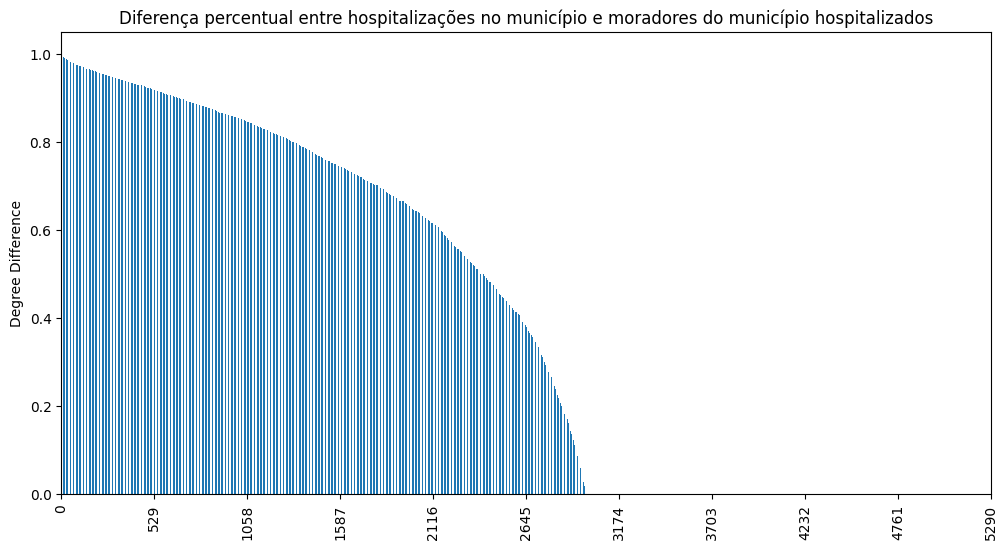

In [6]:
# plotting the degree difference
degree_diff.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Diferença percentual entre hospitalizações no município e moradores do município hospitalizados', ylabel='Degree Difference', xticks=range(0,len(degree_diff),len(degree_diff)//10))

In [7]:
(degree_diff < 0.5).sum(), (degree_diff >= 0.5).sum(), (degree_diff[degree_diff !=0] < 0.5).sum()

(2887, 2405, 577)

In [8]:
(degree_diff == 0).sum(),

(2310,)

In [9]:
df['MUNIC_RES'].unique().shape

(5292,)

<Axes: title={'center': 'Degree Difference by City'}, ylabel='Degree Difference'>

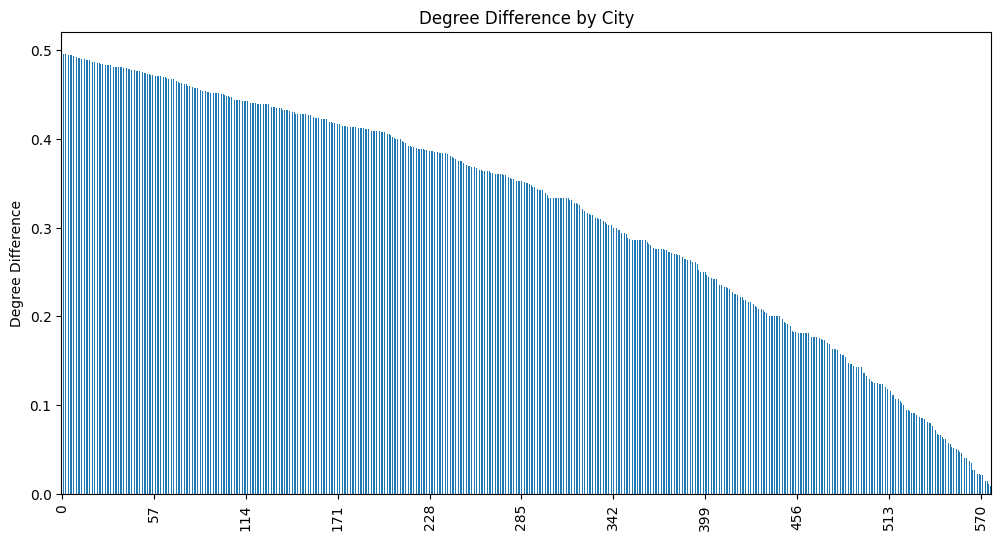

In [10]:
d = degree_diff[(degree_diff > 0.0) & (degree_diff < 0.5)]
d.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Degree Difference by City', ylabel='Degree Difference', xticks=range(0,len(d),len(d)//10))

In [13]:
pop = pd.read_excel("data/estimativa_dou_2024.ods", engine="odf", sheet_name="MUNICÍPIOS")

In [14]:
pop

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NOS MUNICÍPIOS BRASILEIROS COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
1,RO,11,00015,Alta Floresta D'Oeste,22853
2,RO,11,00023,Ariquemes,108573
3,RO,11,00031,Cabixi,5690
4,RO,11,00049,Cacoal,97637
...,...,...,...,...,...
5568,GO,52,22203,Vila Boa,4185
5569,GO,52,22302,Vila Propício,5982
5570,DF,53,00108,Brasília,2982818
5571,NaN,NaN,NaN,NaN,NaN
